# 한글폰트 설치

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 런타임 다시시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 8 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (38.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 129824 files and direct

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
# Colab에 Mecab 설치
!pip install konlpy
!pip install mecab-python
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 40.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.6/581.6 kB 7.0 MB/s eta 0:00:00
  Created wheel for mecab-python: filename=mecab_python-1.0.0-py3-none-any.whl size=1232 sha256=8772c5e3729c4038f0f00d4f37014b44aa7b818b0230e8dafe5a5ee4b25ad1b3
  Stored in directory: /root/.cache/pip/wheels/ec/41/c8/ce8fb469be2547ce596c4000613806505dc54c296aae45da71
Successfully built mecab-python
Install mecab-ko
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0   947k      0  0:00:01  0:00:01 --:--:-- 1484k
mecab-0.996-ko-0.9.2/
mecab-0.996-ko-0.9.2/example/
mecab-0.996-ko-0.9.2/example/ex

In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")

('ratings_total.txt', <http.client.HTTPMessage at 0x7f36f719d810>)

In [ ]:
total_data = pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])
print('전체 리뷰 개수 :',len(total_data)) # 전체 리뷰 개수 출력

전체 리뷰 개수 : 200000


In [ ]:
total_data[:5]

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


In [ ]:
total_data['label'] = np.select([total_data.ratings > 3], [1], default=0)
total_data[:5]

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1


In [ ]:
total_data['ratings'].nunique(), total_data['reviews'].nunique(), total_data['label'].nunique()

(4, 199908, 2)

In [ ]:
total_data.drop_duplicates(subset=['reviews'], inplace=True) # reviews 열에서 중복인 내용이 있다면 중복 제거
print('총 샘플의 수 :',len(total_data))

총 샘플의 수 : 199908


In [ ]:
print(total_data.isnull().values.any())

False


In [ ]:
train_data, test_data = train_test_split(total_data, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 149931
테스트용 리뷰의 개수 : 49977


<Axes: >

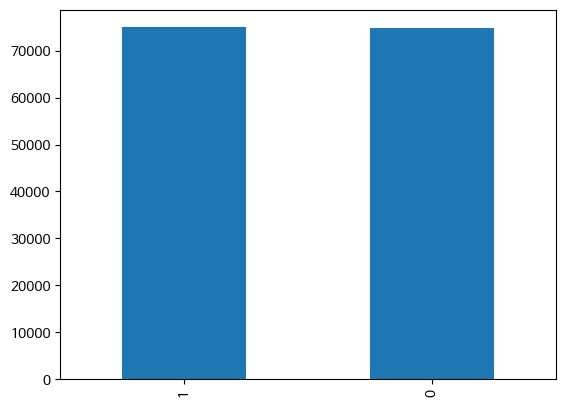

In [ ]:
train_data['label'].value_counts().plot(kind = 'bar')

In [ ]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0  74918
1      1  75013


In [ ]:
# 한글과 공백을 제외하고 모두 제거
train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['reviews'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

<ipython-input-14-5c91c21161d5>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


ratings    0
reviews    0
label      0
dtype: int64


In [ ]:
test_data.drop_duplicates(subset = ['reviews'], inplace=True) # 중복 제거
test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['reviews'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))


전처리 후 테스트용 샘플의 개수 : 49977


<ipython-input-15-5968a3f5f2bc>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행


In [ ]:
mecab = Mecab()
print(mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는 게 나을 뻔'))

['와', '이런', '것', '도', '상품', '이', '라고', '차라리', '내', '가', '만드', '는', '게', '나을', '뻔']


In [ ]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']


In [ ]:
train_data['tokenized'] = train_data['reviews'].apply(mecab.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [ ]:
test_data['tokenized'] = test_data['reviews'].apply(mecab.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [ ]:
negative_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)

In [ ]:
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('네요', 31802), ('는데', 20197), ('안', 19719), ('어요', 14838), ('있', 13200), ('너무', 13057), ('했', 11766), ('좋', 9803), ('배송', 9677), ('같', 8997), ('어', 8929), ('구매', 8869), ('거', 8861), ('없', 8672), ('아요', 8640), ('습니다', 8436), ('그냥', 8355), ('되', 8345), ('잘', 8029), ('않', 7985)]


In [ ]:
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('좋', 39422), ('아요', 21186), ('네요', 19894), ('어요', 18673), ('잘', 18603), ('구매', 16165), ('습니다', 13320), ('있', 12391), ('배송', 12274), ('는데', 11635), ('합니다', 9801), ('했', 9783), ('먹', 9640), ('재', 9274), ('너무', 8398), ('같', 7867), ('만족', 7259), ('거', 6484), ('어', 6330), ('쓰', 6291)]


긍정 리뷰의 평균 길이 : 13.579646194659592
부정 리뷰의 평균 길이 : 17.03148775995088


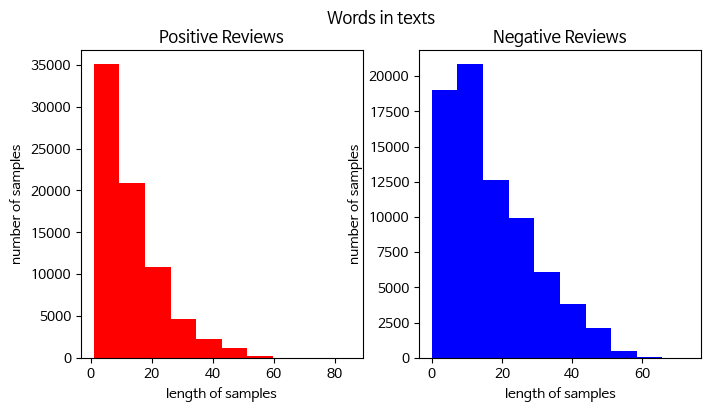

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(8,4))
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [ ]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 40127
등장 빈도가 1번 이하인 희귀 단어의 수: 18275
단어 집합에서 희귀 단어의 비율: 45.5429012884093
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.7964299021840265


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 21854


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[:3])

[[67, 2060, 300, 14294, 263, 73, 6, 237, 168, 136, 801, 2940, 626, 2, 76, 62, 207, 40, 1344, 155, 3, 6], [482, 400, 52, 8525, 2592, 2450, 338, 2941, 251, 2351, 39, 473, 2], [45, 24, 832, 104, 35, 2366, 160, 7, 10, 8058, 4, 1319, 30, 138, 323, 44, 59, 160, 138, 7, 1916, 2, 113, 163, 1385, 307, 119, 135]]


In [ ]:
print(X_test[:3])

[[14, 704, 767, 115, 186, 252, 12], [338, 3907, 62, 3819, 1624], [11, 69, 2, 49, 164, 3, 27, 15, 6, 514, 289, 17, 92, 110, 584, 59, 7, 2]]


리뷰의 최대 길이 : 85
리뷰의 평균 길이 : 15.304473391093236


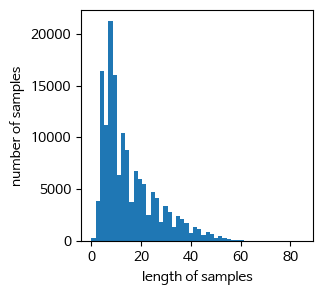

In [ ]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.figure(figsize=(3,3))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
max_len = 80
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 80 이하인 샘플의 비율: 99.99933302652553


In [ ]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
1875/1875 [==============================] - ETA: 0s - loss: 0.2934 - acc: 0.8870
Epoch 1: val_acc improved from -inf to 0.90709, saving model to best_model.h5
1875/1875 [==============================] - 63s 29ms/step - loss: 0.2934 - acc: 0.8870 - val_loss: 0.2550 - val_acc: 0.9071
Epoch 2/15
1875/1875 [==============================] - ETA: 0s - loss: 0.2273 - acc: 0.9178
Epoch 2: val_acc improved from 0.90709 to 0.91576, saving model to best_model.h5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2273 - acc: 0.9178 - val_loss: 0.2289 - val_acc: 0.9158
Epoch 3/15
1875/1875 [==============================] - ETA: 0s - loss: 0.2065 - acc: 0.9265
Epoch 3: val_acc improved from 0.91576 to 0.92227, saving model to best_model.h5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2065 - acc: 0.9265 - val_loss: 0.2168 - val_acc: 0.9223
Epoch 4/15
1875/1875 [==============================] - ETA: 0s - loss: 0.1929 - acc: 0.9320
Epoch 4: val_

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

1562/1562 [==============================] - 7s 4ms/step - loss: 0.2185 - acc: 0.9211

 테스트 정확도: 0.9211


# 시각화

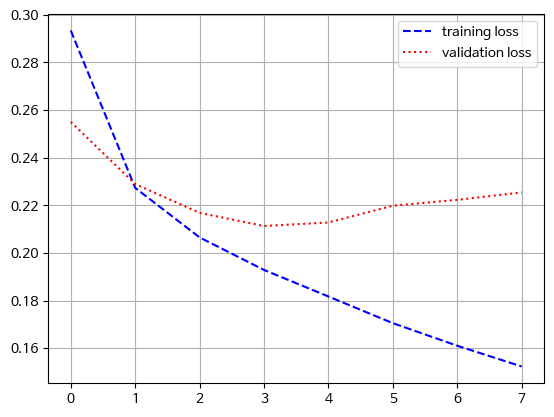

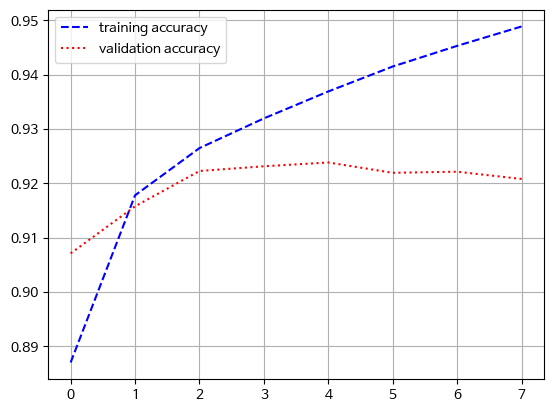

In [ ]:
hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

plt.plot(loss, 'b--', label = 'training loss')
plt.plot(val_loss, 'r:', label='validation loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(acc, 'b--', label = 'training accuracy')
plt.plot(val_acc, 'r:', label='validation accuracy')
plt.legend()
plt.grid()

plt.show()

# 감정예측

In [ ]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = mecab.morphs(new_sentence)
  new_sentence = [word for word in new_sentence if not word in stopwords]
  encoded = tokenizer.texts_to_sequences([new_sentence])
  pad_new = pad_sequences(encoded, maxlen = max_len)
  score = float(loaded_model.predict(pad_new))

  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format( score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format( (1 - score) * 100))

In [ ]:
sentiment_predict('이 상품 진짜 좋아요... 저는 강추합니다. 대박')
sentiment_predict('돈주고 사는게 아깝네요..')

1/1 [==============================] - 0s 20ms/step
96.71% 확률로 긍정 리뷰입니다.
1/1 [==============================] - 0s 21ms/step
99.28% 확률로 부정 리뷰입니다.


In [ ]:
sentiment_predict('진짜 배송도 늦고 개짜증나네요. 뭐 이런 걸 상품이라고 만듬?')
sentiment_predict('사진하고 실물하고 너무 달라요.')

1/1 [==============================] - 0s 20ms/step
99.69% 확률로 부정 리뷰입니다.
1/1 [==============================] - 0s 26ms/step
99.40% 확률로 부정 리뷰입니다.


In [ ]:
sentiment_predict('사진하고 실물하고 너무 달라요.')

1/1 [==============================] - 0s 20ms/step
99.40% 확률로 부정 리뷰입니다.


In [ ]:
sentiment_predict('배송도 빠르고 색감도 너무 이뻐요.')

1/1 [==============================] - 0s 25ms/step
99.56% 확률로 긍정 리뷰입니다.


In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

1/1 [==============================] - 0s 20ms/step


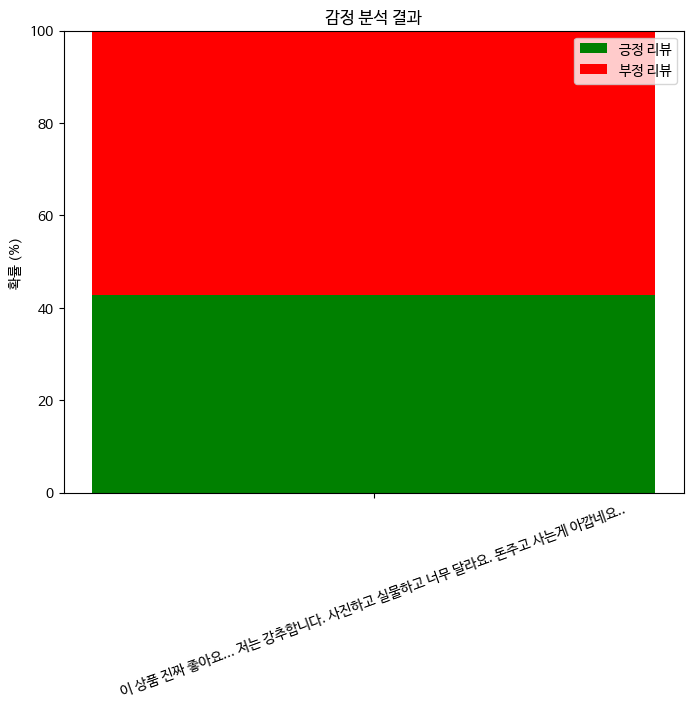

In [ ]:
import re
import matplotlib.pyplot as plt
from konlpy.tag import Mecab
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def sentiment_predict(new_sentence):
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', new_sentence)
    new_sentence = mecab.morphs(new_sentence)
    new_sentence = [word for word in new_sentence if not word in stopwords]
    encoded = tokenizer.texts_to_sequences([new_sentence])
    pad_new = pad_sequences(encoded, maxlen=max_len)
    score = float(loaded_model.predict(pad_new))

    return score

def visualize_sentiment(sentences):
    positive_scores = []
    negative_scores = []

    for sentence in sentences:
        score = sentiment_predict(sentence)
        positive_scores.append(score * 100)
        negative_scores.append((1 - score) * 100)

    plt.figure(figsize=(8, 6))
    plt.bar(range(len(sentences)), positive_scores, label='긍정 리뷰', color='green')
    plt.bar(range(len(sentences)), negative_scores, bottom=positive_scores, label='부정 리뷰', color='red')
    plt.ylabel('확률 (%)')
    plt.title('감정 분석 결과')
    plt.xticks(range(len(sentences)), sentences, rotation=20)
    plt.ylim(0, 100)
    plt.legend()
    plt.show()

# 두 문장에 대해 감정 분석 결과를 시각화합니다.
sentences = ['이 상품 진짜 좋아요... 저는 강추합니다. 사진하고 실물하고 너무 달라요. 돈주고 사는게 아깝네요..']
visualize_sentiment(sentences)


1/1 [==============================] - 0s 21ms/step


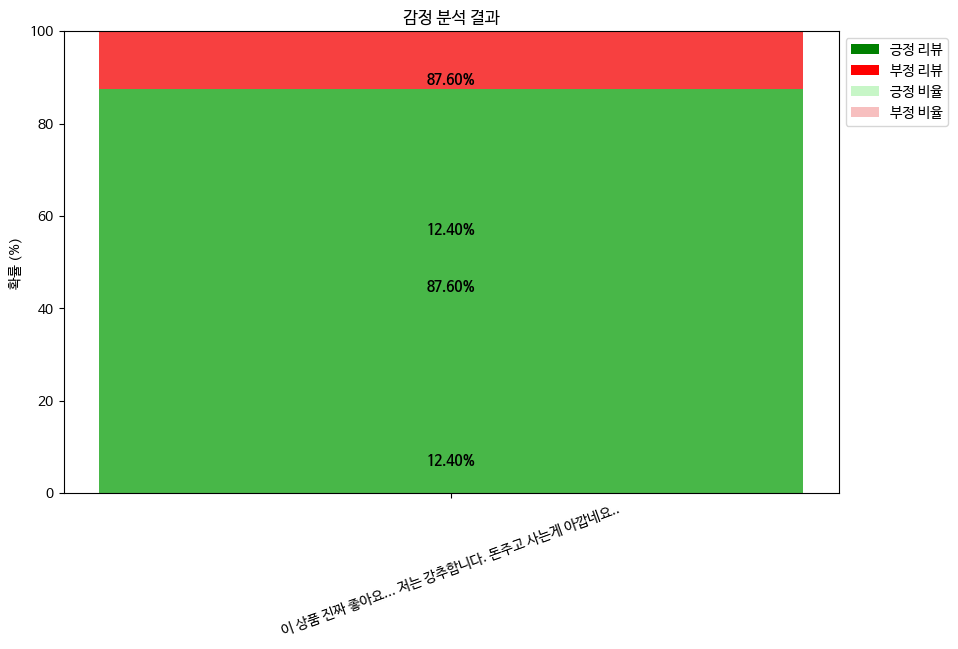

In [ ]:
import re
import matplotlib.pyplot as plt
from konlpy.tag import Mecab
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def sentiment_predict(new_sentence):
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', new_sentence)
    new_sentence = mecab.morphs(new_sentence)
    new_sentence = [word for word in new_sentence if not word in stopwords]
    encoded = tokenizer.texts_to_sequences([new_sentence])
    pad_new = pad_sequences(encoded, maxlen=max_len)
    score = float(loaded_model.predict(pad_new))

    return score

def visualize_sentiment(sentences):
    positive_scores = []
    negative_scores = []

    for sentence in sentences:
        score = sentiment_predict(sentence)
        positive_scores.append(score * 100)
        negative_scores.append((1 - score) * 100)

    total_scores = [positive_scores[i] + negative_scores[i] for i in range(len(sentences))]
    positive_ratios = [positive_scores[i] / total_scores[i] * 100 for i in range(len(sentences))]
    negative_ratios = [negative_scores[i] / total_scores[i] * 100 for i in range(len(sentences))]

    plt.figure(figsize=(10,6))
    bar_width = 0.35
    bar_positions = range(len(sentences))

    plt.bar(bar_positions, positive_scores, label='긍정 리뷰', color='green', width=bar_width)
    plt.bar(bar_positions, negative_scores, label='부정 리뷰', color='red', width=bar_width, bottom=positive_scores)
    plt.bar(bar_positions, positive_ratios, label='긍정 비율', color='lightgreen', width=bar_width, alpha=0.5)
    plt.bar(bar_positions, negative_ratios, label='부정 비율', color='lightcoral', width=bar_width, bottom=positive_ratios, alpha=0.5)

    plt.ylabel('확률 (%)')
    plt.title('감정 분석 결과')
    plt.xticks(bar_positions, sentences, rotation=20)
    plt.ylim(0, 100)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    # 각 막대 위에 퍼센트를 표시합니다.
    for i, v in enumerate(positive_scores):
        plt.text(i, v + 1, f'{v:.2f}%', ha='center', fontsize=10, fontweight='bold', color='black')

    for i, v in enumerate(negative_scores):
        plt.text(i, v / 2, f'{v:.2f}%', ha='center', fontsize=10, fontweight='bold', color='black')

    for i, v in enumerate(positive_ratios):
        plt.text(i, v / 2, f'{v:.2f}%', ha='center', fontsize=10, fontweight='bold', color='black')

    for i, v in enumerate(negative_ratios):
        plt.text(i, v + (100 - v) / 2, f'{v:.2f}%', ha='center', fontsize=10, fontweight='bold', color='black')

    plt.show()

# 두 문장에 대해 감정 분석 결과와 비율을 시각화합니다.
sentences = ['이 상품 진짜 좋아요... 저는 강추합니다. 돈주고 사는게 아깝네요..']
visualize_sentiment(sentences)



1/1 [==============================] - 0s 39ms/step


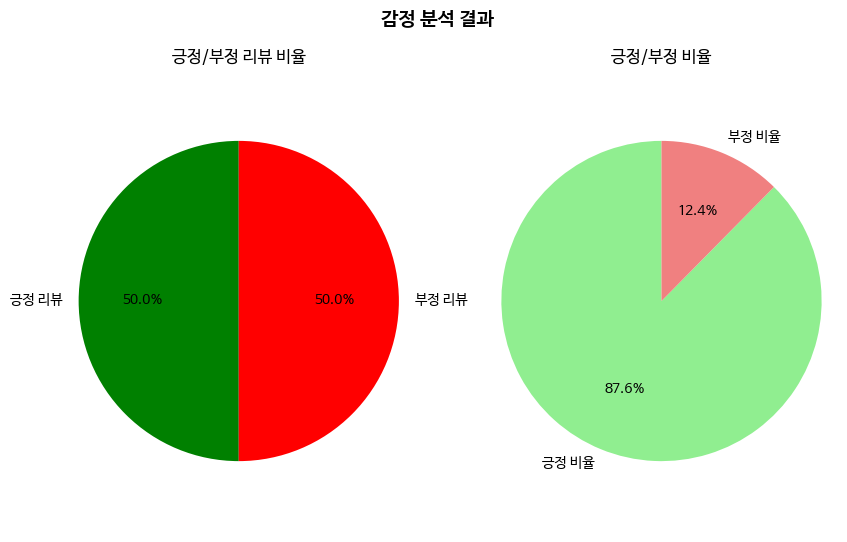

In [ ]:
import re
import matplotlib.pyplot as plt
from konlpy.tag import Mecab
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def sentiment_predict(new_sentence):
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', new_sentence)
    new_sentence = mecab.morphs(new_sentence)
    new_sentence = [word for word in new_sentence if not word in stopwords]
    encoded = tokenizer.texts_to_sequences([new_sentence])
    pad_new = pad_sequences(encoded, maxlen=max_len)
    score = float(loaded_model.predict(pad_new))

    return score

def visualize_sentiment(sentences):
    positive_scores = []
    negative_scores = []

    for sentence in sentences:
        score = sentiment_predict(sentence)
        positive_scores.append(score * 100)
        negative_scores.append((1 - score) * 100)

    total_scores = [positive_scores[i] + negative_scores[i] for i in range(len(sentences))]
    positive_ratios = [positive_scores[i] / total_scores[i] * 100 for i in range(len(sentences))]
    negative_ratios = [negative_scores[i] / total_scores[i] * 100 for i in range(len(sentences))]

    plt.figure(figsize=(10, 6))

    # 긍정/부정 리뷰 비율을 나타내는 파이차트
    plt.subplot(1, 2, 1)
    labels = ['긍정 리뷰', '부정 리뷰']
    colors = ['green', 'red']
    plt.pie(total_scores, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('긍정/부정 리뷰 비율')

    # 긍정/부정 비율을 나타내는 파이차트
    plt.subplot(1, 2, 2)
    labels = ['긍정 비율', '부정 비율']
    colors = ['lightgreen', 'lightcoral']
    plt.pie([positive_ratios[0], negative_ratios[0]], labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('긍정/부정 비율')

    plt.suptitle('감정 분석 결과', fontsize=14, fontweight='bold')

    plt.show()

# 두 문장에 대해 감정 분석 결과와 비율을 시각화합니다.
sentences = ['이 상품 진짜 좋아요... 저는 강추합니다. 돈주고 사는게 아깝네요..',
             '제가 받은 상품은 불량품이었습니다. 환불해주세요.']
visualize_sentiment(sentences)

1/1 [==============================] - 0s 22ms/step


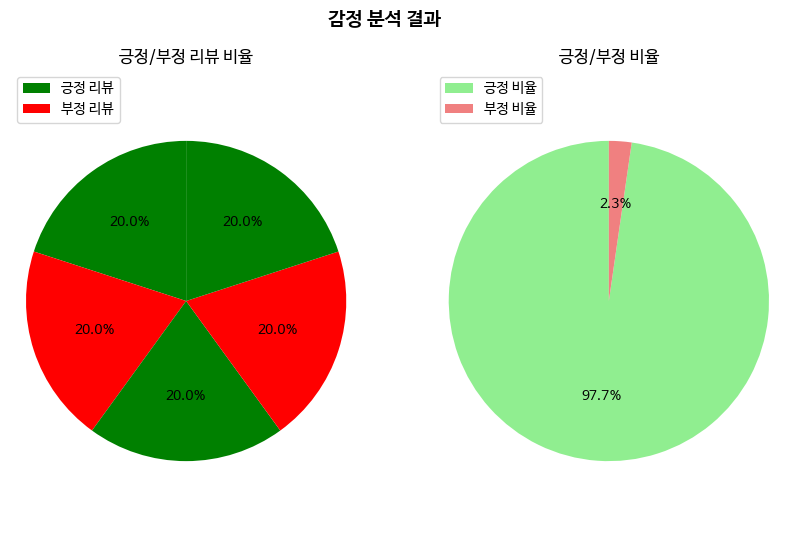

In [ ]:
import re
import matplotlib.pyplot as plt
from konlpy.tag import Mecab
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def sentiment_predict(new_sentence):
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', new_sentence)
    new_sentence = mecab.morphs(new_sentence)
    new_sentence = [word for word in new_sentence if not word in stopwords]
    encoded = tokenizer.texts_to_sequences([new_sentence])
    pad_new = pad_sequences(encoded, maxlen=max_len)
    score = float(loaded_model.predict(pad_new))

    return score

def visualize_sentiment(sentences):
    positive_scores = []
    negative_scores = []

    for sentence in sentences:
        score = sentiment_predict(sentence)
        positive_scores.append(score * 100)
        negative_scores.append((1 - score) * 100)

    total_scores = [positive_scores[i] + negative_scores[i] for i in range(len(sentences))]
    positive_ratios = [positive_scores[i] / total_scores[i] * 100 for i in range(len(sentences))]
    negative_ratios = [negative_scores[i] / total_scores[i] * 100 for i in range(len(sentences))]

    plt.figure(figsize=(10, 6))

    # 긍정/부정 리뷰 비율을 나타내는 파이차트
    plt.subplot(1, 2, 1)
    colors = ['green', 'red']
    plt.pie(total_scores, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('긍정/부정 리뷰 비율')
    plt.legend(['긍정 리뷰', '부정 리뷰'], loc='upper left')

    # 긍정/부정 비율을 나타내는 파이차트
    plt.subplot(1, 2, 2)
    colors = ['lightgreen', 'lightcoral']
    plt.pie([positive_ratios[0], negative_ratios[0]], colors=colors, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('긍정/부정 비율')
    plt.legend(['긍정 비율', '부정 비율'], loc='upper left')

    plt.suptitle('감정 분석 결과', fontsize=14, fontweight='bold')

    plt.show()

# 두 문장에 대해 감정 분석 결과와 비율을 시각화합니다.
sentences = ['이 상품 진짜 좋아요... 저는 강추합니다.',
             '제가 받은 상품은 불량품이었습니다. 환불해주세요.',
             '너무 비싸고 성능도 별로에요. 추천하지 않아요.',
             '품질이 좋고 배송도 빨라서 만족합니다!',
             '이 정도 가격에 이런 퀄리티면 좋은 거 같아요.']

visualize_sentiment(sentences)
